In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


def generate_data():
    """
    Generates a random dataset from a normal distribution.

    Returns:
        diabetes_X_train: the training dataset
        diabetes_y_train: The output corresponding to the training set
        diabetes_X_test: the test dataset
        diabetes_y_test: The output corresponding to the test set

    """
    # Load the diabetes dataset
    diabetes_X, diabetes_y = load_diabetes(return_X_y=True)
    
    # Use only one feature
    diabetes_X = diabetes_X[:, np.newaxis, 2]
    # #Independent Feature Scaling
    # diabetes_X = (diabetes_X - int(np.mean(diabetes_X)))/np.std(diabetes_X)

    # #Dependent Feature Scaling
    # diabetes_y = (diabetes_y - int(np.mean(diabetes_y)))/np.std(diabetes_y) 

    # Split the data into training/testing sets
    diabetes_X_train = diabetes_X[:-20]
    diabetes_X_test = diabetes_X[-20:]

    # Split the targets into training/testing sets
    diabetes_y_train = diabetes_y[:-20].reshape(-1,1)
    diabetes_y_test = diabetes_y[-20:].reshape(-1,1)

    print(f"# Training Samples: {len(diabetes_X_train)}; # Test samples: {len(diabetes_X_test)};")
    return diabetes_X_train, diabetes_y_train, diabetes_X_test, diabetes_y_test


def evaluate(model, X, y, y_predicted):
    """ Calculates and prints evaluation metrics. """
    # The coefficients
    print(f"Slope: {model.W}; Intercept: {model.b}")
    # The mean squared error
    mse = mean_squared_error(y, y_predicted)
    print(f"Mean squared error: {mse:.2f}")
    # The coefficient of determination: 1 is perfect prediction
    r2 = r2_score(y, y_predicted)
    print(f"Coefficient of determination: {r2:.2f}")

    # Plot outputs
    plt.scatter(X, y, color="black")
    plt.plot(X, y_predicted, color="blue", linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

    if r2 >= 0.4:
        print("****** Success ******")
    else:
        print("****** Failed ******")

In [2]:
# import numpy as np

class SimpleLinearRegression:
  
    # import numpy as np

    def __init__(self, iterations=2000, lr=0.5):
        self.iterations = iterations # number of iterations the fit method will be called
        self.lr = lr # The learning rate
        self.losses = [] # A list to hold the history of the calculated losses
        self.W, self.b = None, None # the slope and the intercept of the model

    def __loss(self, y, y_hat):
        """

        :param y: the actual output on the training set
        :param y_hat: the predicted output on the training set
        :return:
            loss: the sum of squared error

        """
        #ToDO calculate the loss. use the sum of squared error formula for simplicity
        loss = None
        loss = 0
        for k in range (y.shape[0]):
          loss += ((y[k]-y_hat[k])**2)
        loss = loss/(y.shape[0])
        self.losses.append(loss)
        return loss

    def __init_weights(self, X):
        """

        :param X: The training set
        """
        weights = np.random.normal(size=X.shape[1] + 1)
        self.W = weights[:X.shape[1]].reshape(-1, X.shape[1])
        self.b = weights[-1]

    def __sgd(self, X, y, y_hat):
        """

        :param X: The training set
        :param y: The actual output on the training set
        :param y_hat: The predicted output on the training set
        :return:
            sets updated W and b to the instance Object (self)
        """
        # ToDo calculate dW & db.
        n = X.shape[0]
        sumW = 0.0
        sumb = 0.0
        for k in range(n):
          sumW += X[k]*(y_hat[k]-y[k])
        dW = (sumW*2)/n
        # print("dW ", dW)
        # db = None
        for k in range(n):
          sumb += (y_hat[k]-y[k])
        db = (sumb*2)/n
        #  ToDO update the self.W and self.b using the learning rate and the values for dW and db
        self.W = self.W-self.lr*dW
        self.b = self.b-self.lr*db


    def fit(self, X, y):
        """

        :param X: The training set
        :param y: The true output of the training set
        :return:
        """
        self.__init_weights(X)
        y_hat = self.predict(X)
        loss = self.__loss(y, y_hat)
        print(f"Initial Loss: {loss}")
        for i in range(self.iterations + 1):
            self.__sgd(X, y, y_hat)
            y_hat = self.predict(X)
            loss = self.__loss(y, y_hat)
            if not i % 100:
                print(f"Iteration {i}, Loss: {loss}")

    def predict(self, X):
        """

        :param X: The training dataset
        :return:
            y_hat: the predicted output
        """
        #ToDO calculate the predicted output y_hat. remember the function of a line is defined as y = WX + b
        import numpy as np
        y_ht = []
        for k in range(X.shape[0]):
          y_ht.append(self.W*X[k] + self.b)
        y_hat = np.array(y_ht).reshape((-1,1))
        return y_hat

# Training Samples: 422; # Test samples: 20;
Initial Loss: [29197.36161984]
Iteration 0, Loss: [5940.99822635]
Iteration 100, Loss: [5216.98157592]
Iteration 200, Loss: [4756.91548872]
Iteration 300, Loss: [4464.57303435]
Iteration 400, Loss: [4278.80817794]
Iteration 500, Loss: [4160.76654094]
Iteration 600, Loss: [4085.75866091]
Iteration 700, Loss: [4038.09596992]
Iteration 800, Loss: [4007.80939056]
Iteration 900, Loss: [3988.56421428]
Iteration 1000, Loss: [3976.33514062]
Iteration 1100, Loss: [3968.56434963]
Iteration 1200, Loss: [3963.62651097]
Iteration 1300, Loss: [3960.48883159]
Iteration 1400, Loss: [3958.49503784]
Iteration 1500, Loss: [3957.22810995]
Iteration 1600, Loss: [3956.42305863]
Iteration 1700, Loss: [3955.91150021]
Iteration 1800, Loss: [3955.58643769]
Iteration 1900, Loss: [3955.37988133]
Iteration 2000, Loss: [3955.24862803]
Slope: [[928.18700531]]; Intercept: [152.92362572]
Mean squared error: 2559.72
Coefficient of determination: 0.47


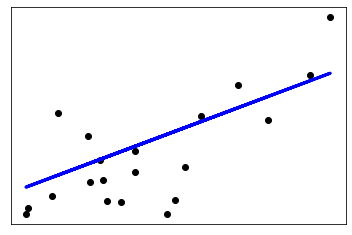

****** Success ******


In [3]:
X_train, y_train, X_test, y_test = generate_data()
model = SimpleLinearRegression()
model.fit(X_train,y_train)
predicted = model.predict(X_test)
evaluate(model, X_test, y_test, predicted)

In [ ]:
import dill
dill.dump(model,open('slrm.pkl','wb'))
saved_model=dill.load(open('slrm.pkl','rb'))